Use logistic regression to build a model to classify the breast cancer dataset  Divide the dataset
into training and testing in the ratio 70:30 . Print the confusion matrix, sensitivity, specificity.
For each iteration of training, store the training and testing accuracy. Plot a graph showing training and testing accuracy Vs iteration no. Do not use sklearn logistic function.

In [134]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [135]:
cancer=load_breast_cancer()
x=cancer.data
y=cancer.target
print(x)
print(y)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

In [136]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.3)

In [137]:
import numpy as np
def sigmoid(z):
    return 1+(1+np.exp(-z))

In [138]:
x_train = x_train.T
y_train = y_train.reshape(1,x_train.shape[1])

x_test = x_test.T
y_test = y_test.reshape(1,x_test.shape[1])

print("x train : ",x_train.shape)
print("y train : ",y_train.shape)
print("x test : ",x_test.shape)
print("y test : ", y_test.shape)

x train :  (30, 398)
y train :  (1, 398)
x test :  (30, 171)
y test :  (1, 171)


In [139]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [140]:
def accuracy(X,Y,W,B):
    Z=np.dot(W.T,X)+B
    P=sigmoid(Z)

    P=P>0.5
    accuracy=np.sum(P==Y)/Y.shape[1]*100
    return accuracy

In [141]:
def model(x_train, y_train, l_rate, iterations):
    n=x_train.shape[1]
    n_feat=x_train.shape[0]

    W=np.zeros((n_feat,1))
    bias=0

    cost_list=[]
    trainacc_list=[]
    testacc_list=[]

    for i in range(iterations):
        z=np.dot(W.T,x_train)+bias
        P=sigmoid(z)
        cost=-(1/n)*np.sum(y_train*np.log(P)+(1-y_train)*np.log(1-P))

        dW=(1/n)*np.dot(P-y_train,x_train.T)
        dB=(1/n)*np.sum(P-y_train)

        W=W-l_rate*dW.T
        bias=bias-l_rate*dB
        
        cost_list.append(cost)

        trainacc_list.append(accuracy(x_train,y_train,W,bias))
        testacc_list.append(accuracy(x_test,y_test,W,bias))
    return W,bias,cost_list,trainacc_list,testacc_list

In [142]:
iternations =10000
learning_rate=0.005
W,B,cost_list,trainacc,testacc=model(x_train, y_train, learning_rate,iternations)


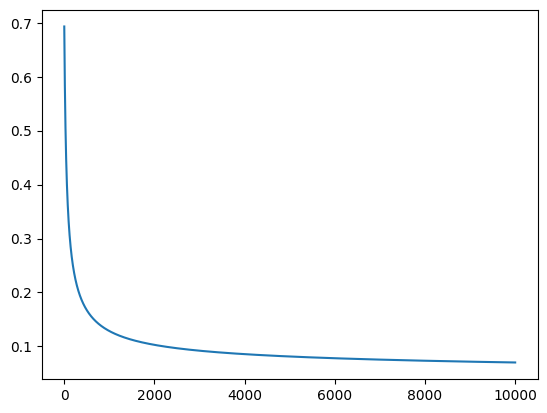

In [143]:
import matplotlib.pyplot as plt
plt.plot(np.arange(iternations),cost_list)

Text(0.5, 1.0, 'Training accuracy')

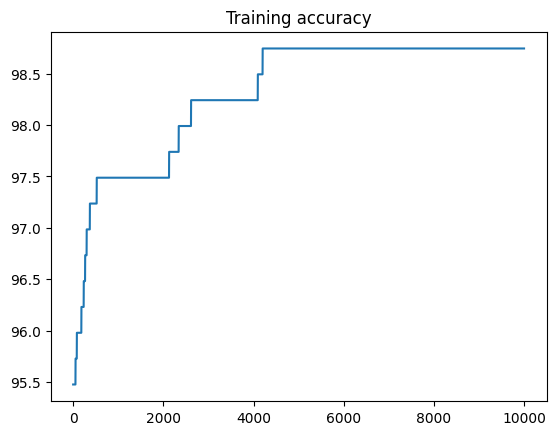

In [144]:
plt.plot(np.arange(iternations),trainacc)
plt.title("Training accuracy")

Text(0.5, 1.0, 'Testing accuracy')

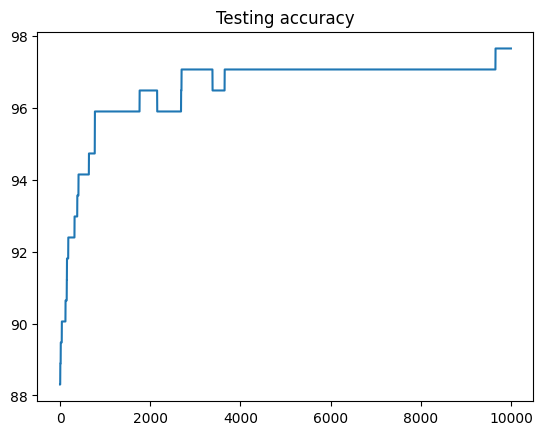

In [145]:
plt.plot(np.arange(iternations),testacc)
plt.title("Testing accuracy")